In [40]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import sys
import tensorflow as tf
import json
import cv2
import numpy as np


sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))
from segment.data import input_fn
from segment.display import DrawFeatures

In [52]:
def display(img):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.imshow(img)
    plt.show()

In [53]:
record_dir = '../cocorecord'
trainingsetDescriptionFile = '{}/description.json'.format(record_dir)
trainingsetDescription = json.load(open(trainingsetDescriptionFile))

In [59]:
config = {
        'batch_size': 1,
        'trainingset': trainingsetDescription,
        'input_shape': [512, 512, 3],
        'augment_rotation' : 25., # Rotation in degrees
        'augment_flip_x': False,
        'augment_flip_y': True,
        'augment_brightness':0.,
        'augment_contrast': 0.,
        'augment_shift_x': 0.0, # in fraction of image - Unnecessary with random crop
        'augment_shift_y': 0.0, # in fraction of image - Unnecessary with random crop
        'scale_min': 0.75, # in fraction of image
        'scale_max': 1.25, # in fraction of image
        'ignore_label': trainingsetDescription['classes']['ignore'],
        'classes': trainingsetDescription['classes']['classes'],
        'image_crops': 1,
        'area_filter_min': 25,
        'epochs': 1,
        }

In [60]:
train_dataset = input_fn(True, record_dir, config)
test_dataset = input_fn(False, record_dir, config)

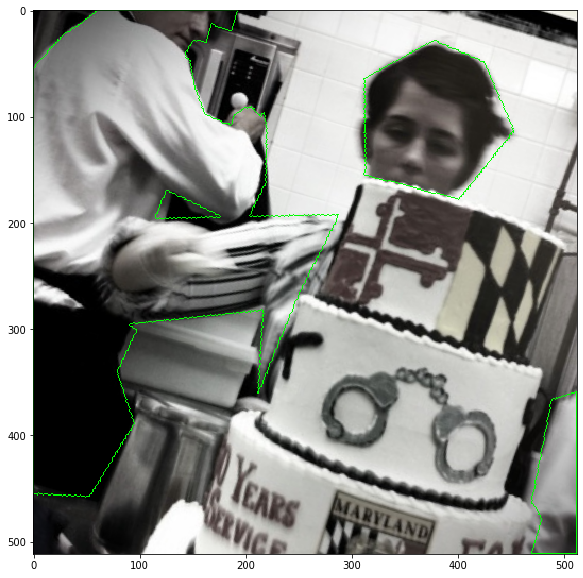

In [63]:
iterator = iter(train_dataset)
image, mask  = iterator.get_next()

for j in range(config['batch_size']):
    img = tf.squeeze(image[j]).numpy().astype(np.uint8)
    ann = tf.squeeze(mask[j]).numpy().astype(np.uint8)

    iman = DrawFeatures(img, ann, config)
    display(iman)